In [11]:
# ruff: noqa: E501

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rock_physics_open.span_wagner import co2_properties

from fmu.pem import INTERNAL_EQUINOR

In [2]:
# Define parameter ranges for our analysis
temperature = np.linspace(20.0, 200.0, 100)  # Temperature in °C
const_temp = 80.0 * np.ones_like(temperature)
pressure = np.linspace(5.0e6, 50.0e6, 100)  # Pressure in Pa
const_pressure = 20.0e6 * np.ones_like(temperature)

# Calculate CO2 properties for different scenarios
# Varying temperature
co2_t = co2_properties(temperature, const_pressure)
# Varying pressure
co2_p = co2_properties(const_temp, pressure)

/private/hfle/PycharmProjects/fmu-pem/venv/lib64/python3.11/site-packages/rock_physics_open/span_wagner/co2_properties.py:246: RuntimeWarning: invalid value encountered in power
  inner = _a1 * _t**1.0 + _a2 * _t**1.5 + _a3 * _t**2.0 + _a4 * _t**4.0


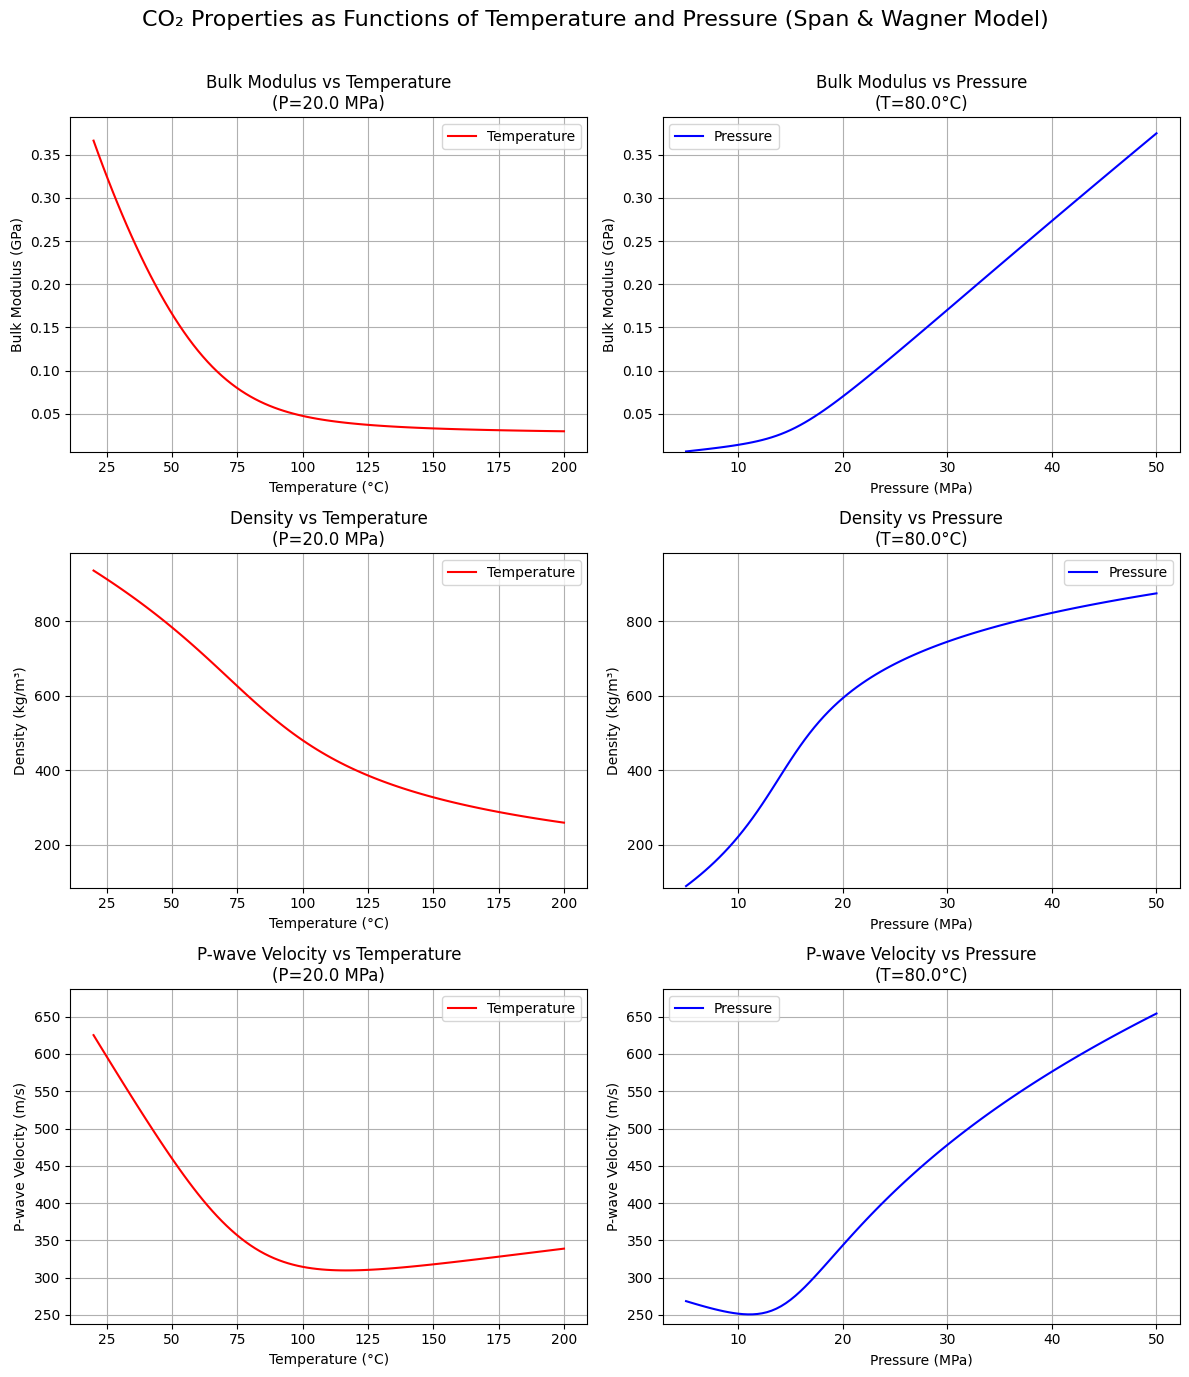

In [3]:
# Create a 3x2 grid of subplots (only temperature and pressure variations)
fig, axes = plt.subplots(3, 2, figsize=(12, 14))

# Row 1: Bulk modulus (K)
# Temperature variation
axes[0, 0].plot(temperature, co2_t[2] / 1e9, color="red", label="Temperature")
axes[0, 0].set_xlabel("Temperature (°C)")
axes[0, 0].set_ylabel("Bulk Modulus (GPa)")
axes[0, 0].set_title(f"Bulk Modulus vs Temperature\n(P={const_pressure[0] / 1e6} MPa)")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Pressure variation
axes[0, 1].plot(pressure / 1e6, co2_p[2] / 1e9, color="blue", label="Pressure")
axes[0, 1].set_xlabel("Pressure (MPa)")
axes[0, 1].set_ylabel("Bulk Modulus (GPa)")
axes[0, 1].set_title(f"Bulk Modulus vs Pressure\n(T={const_temp[0]}°C)")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Synchronize y-axis limits for bulk modulus plots
bulk_mod_data = np.concatenate([co2_t[2] / 1e9, co2_p[2] / 1e9])
bulk_mod_ylim = [np.min(bulk_mod_data) * 0.95, np.max(bulk_mod_data) * 1.05]
axes[0, 0].set_ylim(bulk_mod_ylim)
axes[0, 1].set_ylim(bulk_mod_ylim)

# Row 2: Density
# Temperature variation
axes[1, 0].plot(temperature, co2_t[1], color="red", label="Temperature")
axes[1, 0].set_xlabel("Temperature (°C)")
axes[1, 0].set_ylabel("Density (kg/m³)")
axes[1, 0].set_title(f"Density vs Temperature\n(P={const_pressure[0] / 1e6} MPa)")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Pressure variation
axes[1, 1].plot(pressure / 1e6, co2_p[1], color="blue", label="Pressure")
axes[1, 1].set_xlabel("Pressure (MPa)")
axes[1, 1].set_ylabel("Density (kg/m³)")
axes[1, 1].set_title(f"Density vs Pressure\n(T={const_temp[0]}°C)")
axes[1, 1].grid(True)
axes[1, 1].legend()

# Synchronize y-axis limits for density plots
density_data = np.concatenate([co2_t[1], co2_p[1]])
density_ylim = [np.min(density_data) * 0.95, np.max(density_data) * 1.05]
axes[1, 0].set_ylim(density_ylim)
axes[1, 1].set_ylim(density_ylim)

# Row 3: P-wave velocity (Vp)
# Temperature variation
axes[2, 0].plot(temperature, co2_t[0], color="red", label="Temperature")
axes[2, 0].set_xlabel("Temperature (°C)")
axes[2, 0].set_ylabel("P-wave Velocity (m/s)")
axes[2, 0].set_title(
    f"P-wave Velocity vs Temperature\n(P={const_pressure[0] / 1e6} MPa)"
)
axes[2, 0].grid(True)
axes[2, 0].legend()

# Pressure variation
axes[2, 1].plot(pressure / 1e6, co2_p[0], color="blue", label="Pressure")
axes[2, 1].set_xlabel("Pressure (MPa)")
axes[2, 1].set_ylabel("P-wave Velocity (m/s)")
axes[2, 1].set_title(f"P-wave Velocity vs Pressure\n(T={const_temp[0]}°C)")
axes[2, 1].grid(True)
axes[2, 1].legend()

# Synchronize y-axis limits for velocity plots
velocity_data = np.concatenate([co2_t[0], co2_p[0]])
velocity_ylim = [np.min(velocity_data) * 0.95, np.max(velocity_data) * 1.05]
axes[2, 0].set_ylim(velocity_ylim)
axes[2, 1].set_ylim(velocity_ylim)

# Fix title overlap by setting layout properly
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
fig.suptitle(
    "CO₂ Properties as Functions of Temperature and Pressure (Span & Wagner Model)",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"../documentation/docs/images/co2_properties_complete.png", dpi=300)
plt.show()

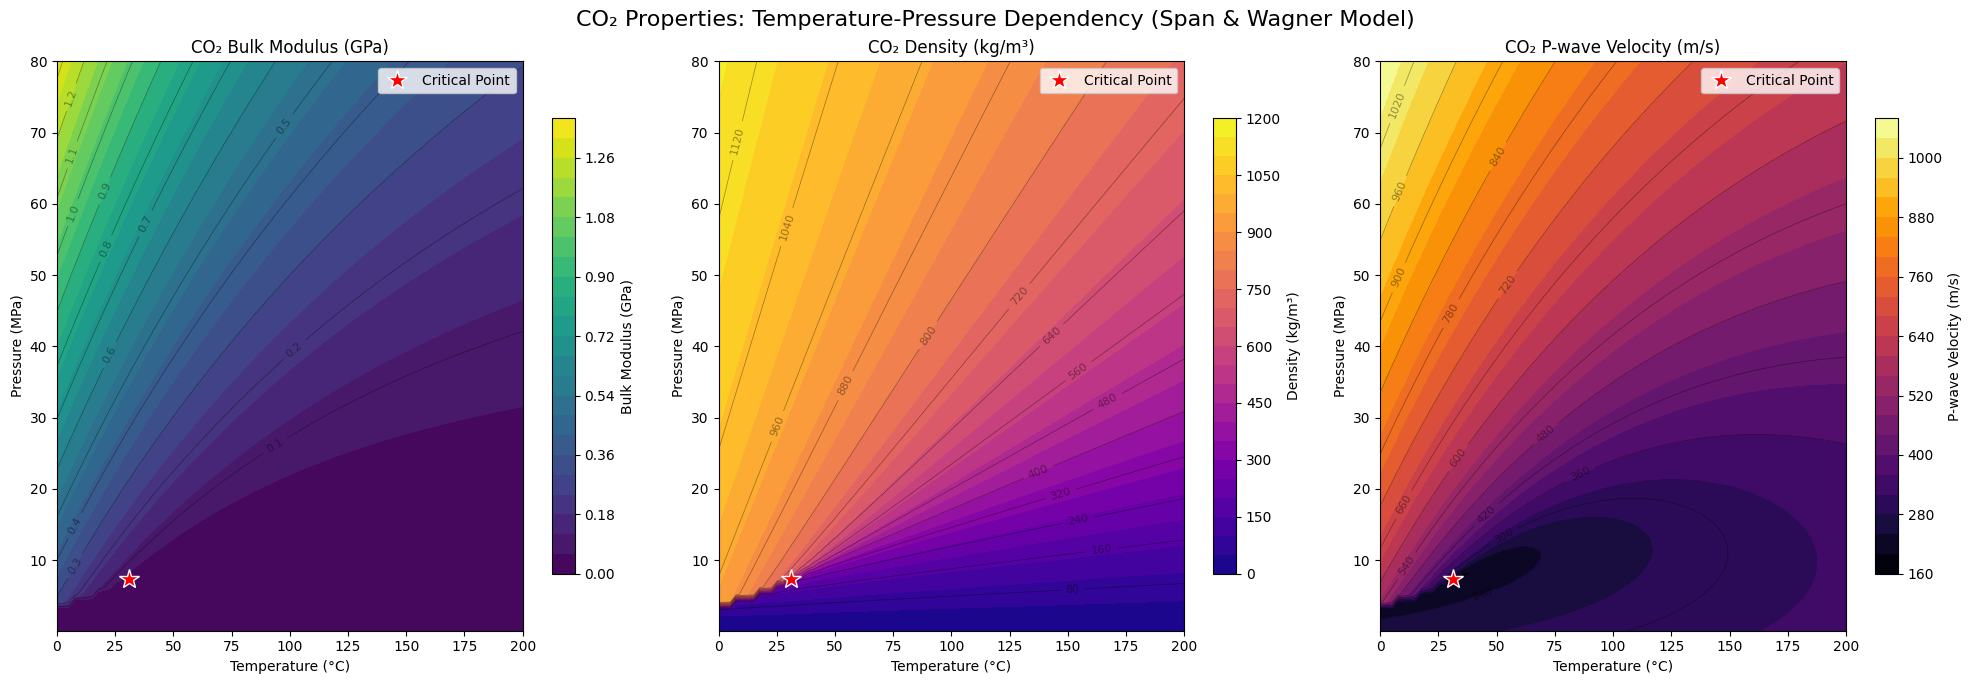

CO₂ Properties Summary (Extended Range: 0 to 200°C, 0.1-80 MPa)
Temperature range: 0.0 to 200.0 °C
Pressure range: 0.1 to 80.0 MPa
Bulk Modulus range: 0.000 - 1.33 GPa
Density range: 1.1 - 1157.9 kg/m³
P-wave velocity range: 185 - 1071 m/s

Critical Point: 31.04°C, 7.38 MPa
Note: Model limitations prevent calculation below 0°C


In [10]:
# Extended temperature-pressure range to capture phase transitions
# CO₂ triple point: -56.6°C (216.58 K), 0.5173 MPa
# Critical point: 31.04°C, 7.377 MPa
# Note: Model valid for T > 0°C due to equation limitations
temp_extended = np.linspace(0, 200, 80)  # Starting at 0°C due to model limitations
press_extended = np.linspace(0.1e6, 80e6, 80)  # Extended pressure range
T_mesh_ext, P_mesh_ext = np.meshgrid(temp_extended, press_extended)

# Flatten meshgrids for calculation
T_flat_ext = T_mesh_ext.flatten()
P_flat_ext = P_mesh_ext.flatten()

# Calculate CO2 properties for extended range
co2_mesh_ext = co2_properties(T_flat_ext, P_flat_ext)

# Reshape results back to meshgrid shape
vp_mesh_ext = co2_mesh_ext[0].reshape(T_mesh_ext.shape)
density_mesh_ext = co2_mesh_ext[1].reshape(T_mesh_ext.shape)
bulk_mod_mesh_ext = co2_mesh_ext[2].reshape(T_mesh_ext.shape) / 1e9  # Convert to GPa

# Create contour plots without phase boundaries
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Bulk modulus contour plot
contour1 = axes[0].contourf(
    T_mesh_ext, P_mesh_ext / 1e6, bulk_mod_mesh_ext, levels=25, cmap="viridis"
)
cs1 = axes[0].contour(
    T_mesh_ext,
    P_mesh_ext / 1e6,
    bulk_mod_mesh_ext,
    levels=15,
    colors="black",
    linewidths=0.5,
    alpha=0.4,
)
axes[0].clabel(cs1, inline=True, fontsize=8, fmt="%.1f")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Pressure (MPa)")
axes[0].set_title("CO₂ Bulk Modulus (GPa)")
cbar1 = plt.colorbar(contour1, ax=axes[0], shrink=0.8)
cbar1.set_label("Bulk Modulus (GPa)")

# Mark critical point only
axes[0].plot(
    31.04,
    7.377,
    "r*",
    markersize=15,
    label="Critical Point",
    markeredgecolor="white",
    markeredgewidth=1,
)
axes[0].legend(loc="upper right", fontsize=10)

# Density contour plot
contour2 = axes[1].contourf(
    T_mesh_ext, P_mesh_ext / 1e6, density_mesh_ext, levels=25, cmap="plasma"
)
cs2 = axes[1].contour(
    T_mesh_ext,
    P_mesh_ext / 1e6,
    density_mesh_ext,
    levels=15,
    colors="black",
    linewidths=0.5,
    alpha=0.4,
)
axes[1].clabel(cs2, inline=True, fontsize=8, fmt="%.0f")
axes[1].set_xlabel("Temperature (°C)")
axes[1].set_ylabel("Pressure (MPa)")
axes[1].set_title("CO₂ Density (kg/m³)")
cbar2 = plt.colorbar(contour2, ax=axes[1], shrink=0.8)
cbar2.set_label("Density (kg/m³)")

# Mark critical point
axes[1].plot(
    31.04,
    7.377,
    "r*",
    markersize=15,
    label="Critical Point",
    markeredgecolor="white",
    markeredgewidth=1,
)
axes[1].legend(loc="upper right", fontsize=10)

# P-wave velocity contour plot
contour3 = axes[2].contourf(
    T_mesh_ext, P_mesh_ext / 1e6, vp_mesh_ext, levels=25, cmap="inferno"
)
cs3 = axes[2].contour(
    T_mesh_ext,
    P_mesh_ext / 1e6,
    vp_mesh_ext,
    levels=15,
    colors="black",
    linewidths=0.5,
    alpha=0.4,
)
axes[2].clabel(cs3, inline=True, fontsize=8, fmt="%.0f")
axes[2].set_xlabel("Temperature (°C)")
axes[2].set_ylabel("Pressure (MPa)")
axes[2].set_title("CO₂ P-wave Velocity (m/s)")
cbar3 = plt.colorbar(contour3, ax=axes[2], shrink=0.8)
cbar3.set_label("P-wave Velocity (m/s)")

# Mark critical point
axes[2].plot(
    31.04,
    7.377,
    "r*",
    markersize=15,
    label="Critical Point",
    markeredgecolor="white",
    markeredgewidth=1,
)
axes[2].legend(loc="upper right", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle(
    "CO₂ Properties: Temperature-Pressure Dependency (Span & Wagner Model)",
    fontsize=16,
    y=0.97,
)
plt.savefig(
    "../documentation/docs/images/co2_properties_meshgrid.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

# Print extended summary statistics
print("CO₂ Properties Summary (Extended Range: 0 to 200°C, 0.1-80 MPa)")
print("=" * 65)
print(
    f"Temperature range: {np.min(temp_extended):.1f} to {np.max(temp_extended):.1f} °C"
)
print(
    f"Pressure range: {np.min(press_extended) / 1e6:.1f} to {np.max(press_extended) / 1e6:.1f} MPa"
)
print(
    f"Bulk Modulus range: {np.min(bulk_mod_mesh_ext):.3f} - {np.max(bulk_mod_mesh_ext):.2f} GPa"
)
print(
    f"Density range: {np.min(density_mesh_ext):.1f} - {np.max(density_mesh_ext):.1f} kg/m³"
)
print(
    f"P-wave velocity range: {np.min(vp_mesh_ext):.0f} - {np.max(vp_mesh_ext):.0f} m/s"
)
print("\nCritical Point: 31.04°C, 7.38 MPa")
print("Note: Model limitations prevent calculation below 0°C")